In [37]:
from graphviz import Digraph
from IPython.display import Image, SVG
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cairosvg
from PIL import Image as PILImage

### Flow Chart

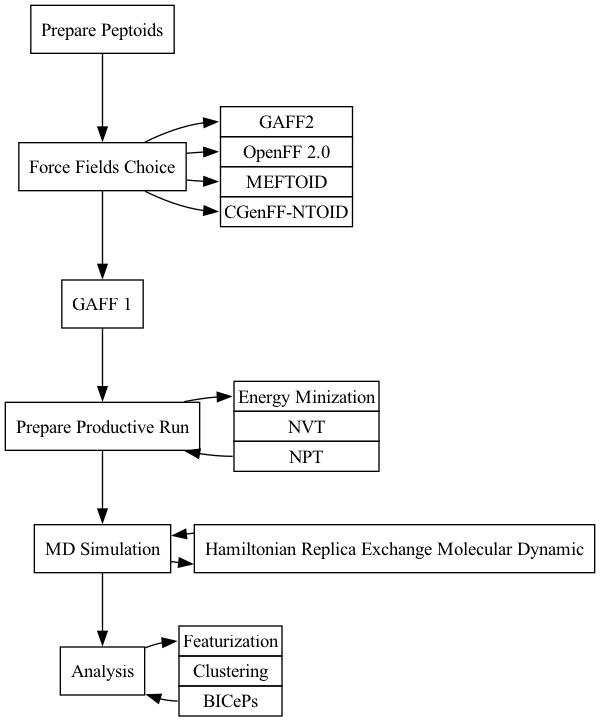

In [23]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph()

# Define nodes
dot.node('0', label='Prepare Peptoids', shape='box')
dot.node('1', label='Force Fields Choice', shape='box')
dot.node('1.1', label='GAFF 1', shape='box')
dot.node('1.2', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="GAFF2">GAFF2</TD></TR><TR><TD PORT="OpenFF2">OpenFF 2.0</TD></TR><TR><TD PORT="MEFTOID">MEFTOID</TD></TR><TR><TD PORT="CGenFF">CGenFF-NTOID</TD></TR></TABLE>>', shape='plaintext')

dot.node('2', label='Prepare Productive Run', shape='box')
dot.node('2.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="EM">Energy Minization</TD></TR><TR><TD PORT="NVT">NVT</TD></TR><TR><TD PORT="NPT">NPT</TD></TR></TABLE>>', shape='plaintext')

dot.node('3', label='MD Simulation', shape='box')
dot.node('3.1', label='Hamiltonian Replica Exchange Molecular Dynamic', shape='box')

dot.node('4', label='Analysis', shape='box')
dot.node('4.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="Featurization">Featurization</TD></TR><TR><TD PORT="Clustering">Clustering</TD></TR><TR><TD PORT="BICePs">BICePs</TD></TR></TABLE>>', shape='plaintext')

# Define the edges with correct port names
edges = [
    ('0', '1'),
    ('1', '1.1'),
    ('1', '1.2:GAFF2'),
    ('1', '1.2:OpenFF2'),
    ('1', '1.2:MEFTOID'),
    ('1', '1.2:CGenFF'),
    
    ('1.1', '2'),
    
    ('2', '2.1:EM'),
    ('2.1:NPT', '2'),
    ('2', '3'),
    
    ('3', '3.1'),
    ('3.1', '3'),
    ('3', '4'),
    
    ('4', '4.1:Featurization'),
    ('4.1:BICePs', '4')
]

# Add edges to the graph
for tail, head in edges:
    dot.edge(tail, head)

# Create subgraphs to control layout
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('1')
    s.node('1.2')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('2')
    s.node('2.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('3')
    s.node('3.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('4')
    s.node('4.1')

# Render the graph
dot.render('flowchart', format='png')
Image(filename='flowchart.png')


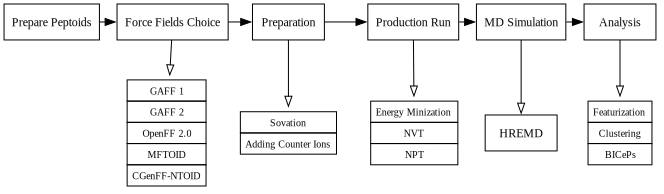

In [58]:
# Create a new directed graph with transparent background
dot = Digraph()
dot.attr(bgcolor='transparent')

# Define nodes with adjusted font size and padding
dot.node('0', label='Prepare Peptoids', shape='box', fontsize='12', width='1', height='.5')
dot.node('1', label='Force Fields Choice', shape='box', fontsize='12', width='1', height='.5')
dot.node('1.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4"><TR><TD PORT="GAFF1">GAFF 1</TD></TR><TR><TD PORT="GAFF2">GAFF 2</TD></TR><TR><TD PORT="OpenFF 2">OpenFF 2.0</TD></TR><TR><TD PORT="MFTOID">MFTOID</TD></TR><TR><TD PORT="CGenFF">CGenFF-NTOID</TD></TR></TABLE>>', shape='plaintext', fontsize='10')

dot.node('2', label='Preparation', shape='box', fontsize='12', width='1', height='.5')
dot.node('2.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4"><TR><TD PORT="Sovation">Sovation</TD></TR><TR><TD PORT="Ion">Adding Counter Ions</TD></TR></TABLE>>', shape='plaintext', fontsize='10')

dot.node('3', label='Production Run', shape='box', fontsize='12', width='1', height='.5')
dot.node('3.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4"><TR><TD PORT="EM">Energy Minization</TD></TR><TR><TD PORT="NVT">NVT</TD></TR><TR><TD PORT="NPT">NPT</TD></TR></TABLE>>', shape='plaintext', fontsize='10')

dot.node('4', label='MD Simulation', shape='box', fontsize='12', width='1', height='.5')
dot.node('4.1', label='HREMD', shape='box', fontsize='12', width='1', height='.5')

dot.node('5', label='Analysis', shape='box', fontsize='12', width='1', height='.5')
dot.node('5.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4"><TR><TD PORT="Featurization">Featurization</TD></TR><TR><TD PORT="Clustering">Clustering</TD></TR><TR><TD PORT="BICePs">BICePs</TD></TR></TABLE>>', shape='plaintext', fontsize='10')

# Define the edges with correct port names and minlen attribute
edges = [
    ('0', '1', 0.5, 'normal'),
    ('1', '1.1', 1, 'empty'),
    
    ('1', '2', 0.5, 'normal'),
    
    ('2', '2.1', 1, 'empty'),
    ('2', '3', 0.5, 'normal'),
    
    ('3', '3.1', 1, 'empty'),
    ('3', '4', 0.5, 'normal'),
    
    ('4', '4.1', 1, 'empty'),
    ('4', '5', 0.5, 'normal'),

    ('5', '5.1', 1, 'empty'),
]

# Add edges to the graph with minlen and arrowhead attribute
for tail, head, minlen, arrowhead in edges:
    dot.edge(tail, head, minlen=str(minlen), arrowhead=arrowhead)

# Render the graph to SVG format
output_path = 'flowchart'
dot.render(output_path, format='svg')

# Display the SVG directly in the notebook
display(SVG(f'{output_path}.svg'))

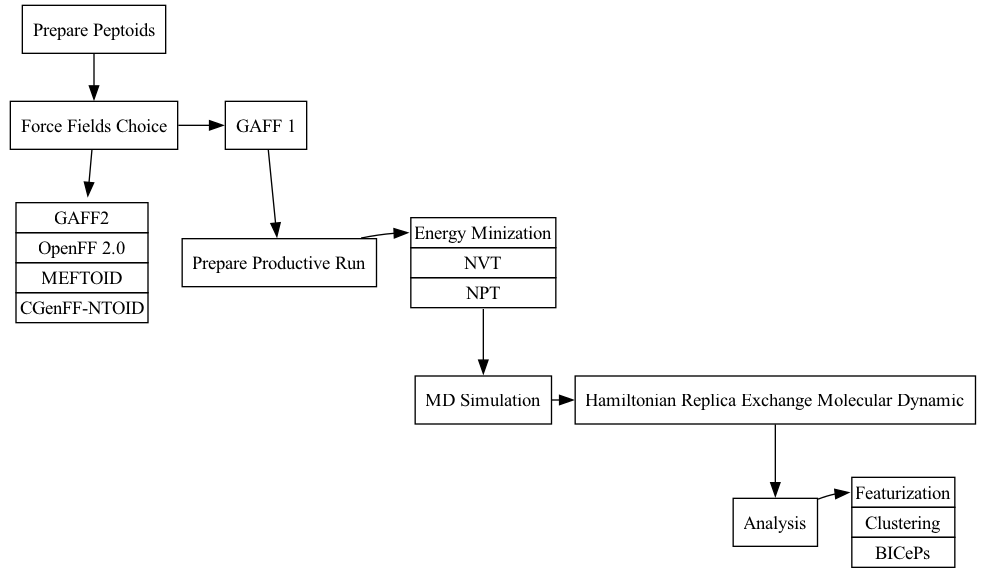

In [33]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph()

# Define nodes
dot.node('0', label='Prepare Peptoids', shape='box')
dot.node('1', label='Force Fields Choice', shape='box')
dot.node('1.1', label='GAFF 1', shape='box')
dot.node('1.2', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="GAFF2">GAFF2</TD></TR><TR><TD PORT="OpenFF2">OpenFF 2.0</TD></TR><TR><TD PORT="MEFTOID">MEFTOID</TD></TR><TR><TD PORT="CGenFF">CGenFF-NTOID</TD></TR></TABLE>>', shape='plaintext')

dot.node('2', label='Prepare Productive Run', shape='box')
dot.node('2.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="EM">Energy Minization</TD></TR><TR><TD PORT="NVT">NVT</TD></TR><TR><TD PORT="NPT">NPT</TD></TR></TABLE>>', shape='plaintext')

dot.node('3', label='MD Simulation', shape='box')
dot.node('3.1', label='Hamiltonian Replica Exchange Molecular Dynamic', shape='box')

dot.node('4', label='Analysis', shape='box')
dot.node('4.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="Featurization">Featurization</TD></TR><TR><TD PORT="Clustering">Clustering</TD></TR><TR><TD PORT="BICePs">BICePs</TD></TR></TABLE>>', shape='plaintext')

# Define the edges with correct port names
edges = [
    ('0', '1'),
    ('1', '1.1'),
    ('1', '1.2'),
    
    ('1.1', '2'),
    
    ('2', '2.1:EM'),
    ('2.1:NPT', '3'),
    
    ('3', '3.1'),
    ('3.1', '4'),
    
    ('4', '4.1:Featurization'),
]

# Add edges to the graph
for tail, head in edges:
    dot.edge(tail, head)

# Create subgraphs to control layout
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('1')
    s.node('1.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('2')
    s.node('2.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('3')
    s.node('3.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('4')
    s.node('4.1')

# Render the graph
dot.render('flowchart', format='png')
Image(filename='flowchart.png')


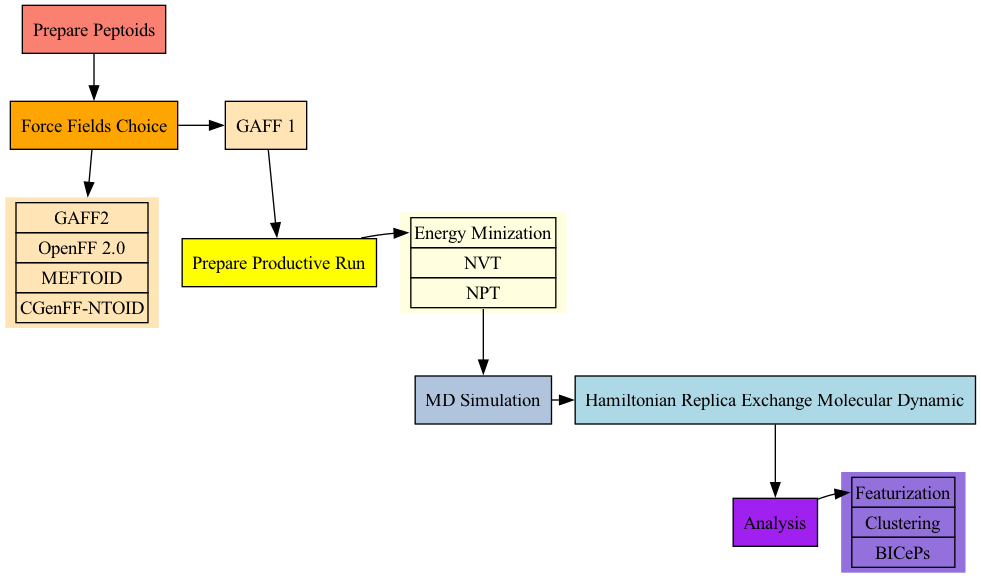

In [45]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph()

# Set graph attributes for transparent background
dot.attr(bgcolor='transparent')

# Define nodes with non-light colors
dot.node('0', label='Prepare Peptoids', shape='box', style='filled', fillcolor='salmon')

dot.node('1', label='Force Fields Choice', shape='box', style='filled', fillcolor='orange')
dot.node('1.1', label='GAFF 1', shape='box', style='filled', fillcolor='moccasin')
dot.node('1.2', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="GAFF2">GAFF2</TD></TR><TR><TD PORT="OpenFF2">OpenFF 2.0</TD></TR><TR><TD PORT="MEFTOID">MEFTOID</TD></TR><TR><TD PORT="CGenFF">CGenFF-NTOID</TD></TR></TABLE>>', shape='plaintext', style='filled', fillcolor='moccasin')

dot.node('2', label='Prepare Productive Run', shape='box', style='filled', fillcolor='yellow')
dot.node('2.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="EM">Energy Minization</TD></TR><TR><TD PORT="NVT">NVT</TD></TR><TR><TD PORT="NPT">NPT</TD></TR></TABLE>>', shape='plaintext', style='filled', fillcolor='lightyellow')

dot.node('3', label='MD Simulation', shape='box', style='filled', fillcolor='lightsteelblue')
dot.node('3.1', label='Hamiltonian Replica Exchange Molecular Dynamic', shape='box', style='filled', fillcolor='lightblue')

dot.node('4', label='Analysis', shape='box', style='filled', fillcolor='purple')
dot.node('4.1', label='<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR><TD PORT="Featurization">Featurization</TD></TR><TR><TD PORT="Clustering">Clustering</TD></TR><TR><TD PORT="BICePs">BICePs</TD></TR></TABLE>>', shape='plaintext', style='filled', fillcolor='mediumpurple')

# Define the edges with correct port names
edges = [
    ('0', '1'),
    ('1', '1.1'),
    ('1', '1.2'),
    
    ('1.1', '2'),
    
    ('2', '2.1:EM'),
    ('2.1:NPT', '3'),
    
    ('3', '3.1'),
    ('3.1', '4'),
    
    ('4', '4.1:Featurization'),
]

# Add edges to the graph
for tail, head in edges:
    dot.edge(tail, head)

# Create subgraphs to control layout
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('1')
    s.node('1.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('2')
    s.node('2.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('3')
    s.node('3.1')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('4')
    s.node('4.1')

# Render the graph
dot.render('flowchart', format='png')
Image(filename='flowchart.png')


### Energy Diagram

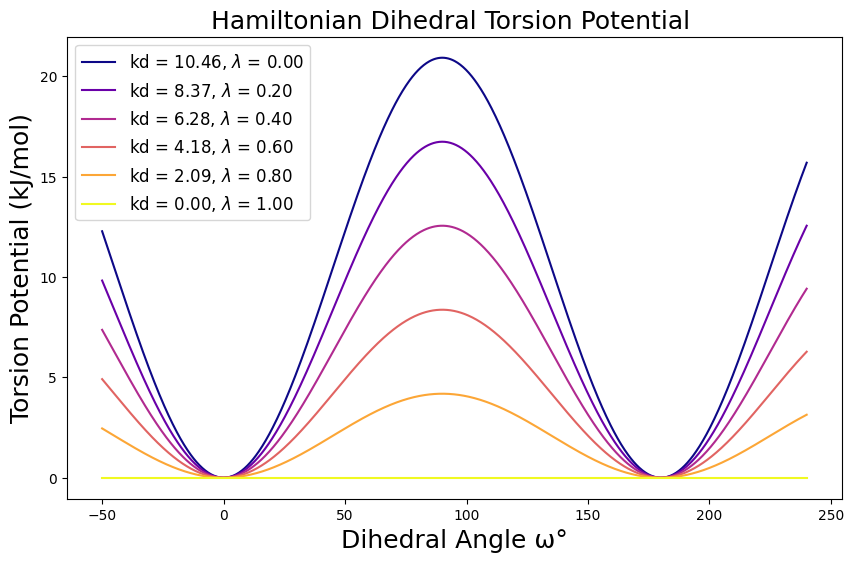

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the torsion potential function
def torsion_potential(omega, k_phi, n=2, omega_s=0):
    return k_phi * (1 + np.cos(np.radians(n * omega) - np.pi))

# Define the dihedral angle values (e.g., from -50 to 290 degrees)
omega = np.linspace(-50, 240, 1000)

# Define the maximum value for k_phi and the number of steps
k_phi_max = 10.46000
num_steps = 6

# Calculate the lambda values for each step
lambda_values = np.linspace(0, 1, num_steps)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, l in enumerate(lambda_values):
    k_phi = (1-l) * k_phi_max
    V = torsion_potential(omega, k_phi, n=2, omega_s=0)
    color = plt.cm.plasma(i / (num_steps - 1))  # Get color from colormap
    ax.plot(omega, V, label=f'kd = {k_phi:.2f}, $\\lambda$ = {l:.2f}', color=color)
ax.set_xlabel('Dihedral Angle ω°', fontsize=18)
ax.set_ylabel('Torsion Potential (kJ/mol)', fontsize=18)
ax.set_title('Hamiltonian Dihedral Torsion Potential ', fontsize=18)
ax.legend(loc='upper left',bbox_to_anchor=(0.0, 1),facecolor='white', fontsize=12)
ax.grid(False)

plt.savefig('torsion_potential_plot.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


### HREX

### Molecule Drawing

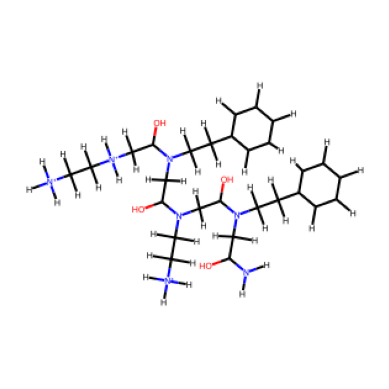

SMILES: [H]C1C([H])C([H])C(C([H])([H])C([H])([H])N(C(O)C([H])([H])N(C(O)C([H])([H])N(C(O)C([H])([H])[N+]([H])([H])C([H])([H])C([H])([H])[N+]([H])([H])[H])C([H])([H])C([H])([H])C2C([H])C([H])C([H])C([H])C2[H])C([H])([H])C([H])([H])[N+]([H])([H])[H])C([H])([H])C(O)N([H])[H])C([H])C1[H]


In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Step 1: Convert PDB to SMILES
pdb_file = 'peptoid/19AE1-4-A/GAFF/protonated/19AE1-4-A.pdb'

# Create a molecule from the PDB file
mol = Chem.MolFromPDBFile(pdb_file, removeHs=False, sanitize=False)

if mol:
    # Generate 2D coordinates for visualization
    AllChem.Compute2DCoords(mol)
    
    # Draw the molecule
    img = Draw.MolToImage(mol, size=(300, 300))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Convert to SMILES string
    smiles = Chem.MolToSmiles(mol)
    print("SMILES:", smiles)
    
else:
    print("Error: Failed to create molecule from PDB.")

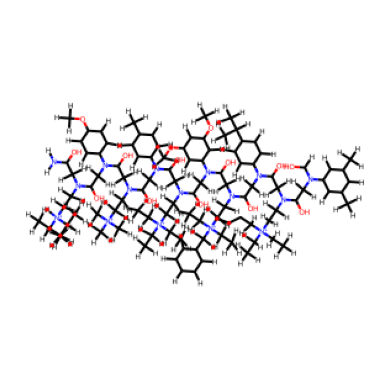

SMILES: [H]CCC([H])([H])[N+](C([H])([H])C([H])([H])[H])(C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])N(C(O)C([H])([H])N(C([H])O)C1C([H])C(C([H])([H])[H])C([H])C(C([H])([H])[H])C1[H])C([H])([H])C(O)N(C1C([H])C([H])C(C([H])(C([H])([H])[H])C([H])([H])[H])C([H])C1[H])C([H])([H])C(O)N(C([H])([H])C(O)N(C1C([H])C(OC([H])([H])[H])C([H])C(OC([H])([H])[H])C1[H])C([H])([H])C(O)N(C([H])([H])C(O)N(C1C([H])C([H])C(C([H])([H])[H])C([H])C1[H])C([H])([H])C(O)N(C([H])([H])C(O)N(C1C([H])C([H])C(OC([H])([H])[H])C([H])C1[H])C([H])([H])C(O)N(C([H])([H])C(O)N([H])[H])C([H])([H])C([H])([H])[N+]([H])(C([H])(C([H])([H])[H])C([H])([H])[H])C([H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])C([H])([H])[N+](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])C([H])([H])[N+](C([H])([H])C([H])([H])[H])(C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])[N+](C([H])([H])C1C([H])C([H])C([H])C([H])C1[H])(C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])[H]


In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Step 1: Convert PDB to SMILES
pdb_file = 'peptoid/19AF1-10-A//GAFF/protonated/19AF1-10-A.pdb'

# Create a molecule from the PDB file
mol = Chem.MolFromPDBFile(pdb_file, removeHs=False, sanitize=False)

if mol:
    # Generate 2D coordinates for visualization
    AllChem.Compute2DCoords(mol)
    
    # Draw the molecule
    img = Draw.MolToImage(mol, size=(300, 300))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Convert to SMILES string
    smiles = Chem.MolToSmiles(mol)
    print("SMILES:", smiles)
else:
    print("Error: Failed to create molecule from PDB.")

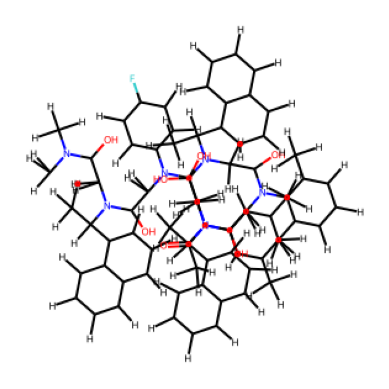

SMILES: [H]C1C([H])C([H])C2C(C1[H])C([H])C([H])C([H])C2C([H])(N(C(O)C([H])([H])N(C1C([H])C([H])C(F)C([H])C1[H])C(O)C([H])([H])N(C(O)C([H])([H])N(C1C(C([H])([H])[H])C([H])C([H])C([H])C1C([H])([H])[H])C(O)C([H])([H])N(C(O)C([H])([H])N(C(=O)C([H])([H])[H])C1C([H])C(C([H])([H])[H])C([H])C(C([H])([H])[H])C1[H])C([H])(C1C([H])C([H])C([H])C2C([H])C([H])C([H])C([H])C21)C([H])([H])[H])C([H])(C1C([H])C([H])C([H])C2C([H])C([H])C([H])C([H])C21)C([H])([H])[H])C([H])([H])C(O)N(C([H])([H])[H])C([H])([H])[H])C([H])([H])[H]


In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Step 1: Convert PDB to SMILES
pdb_file = 'peptoid/13AC1-6-A/GAFF/neutral/13AC1-6-A.pdb'

# Create a molecule from the PDB file
mol = Chem.MolFromPDBFile(pdb_file, removeHs=False, sanitize=False)

if mol:
    # Generate 2D coordinates for visualization
    AllChem.Compute2DCoords(mol)
    
    # Draw the molecule
    img = Draw.MolToImage(mol, size=(300, 300))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Convert to SMILES string
    smiles = Chem.MolToSmiles(mol)
    print("SMILES:", smiles)
    
else:
    print("Error: Failed to create molecule from PDB.")